In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error


In [4]:
data_dir="/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv"

df=pd.read_csv(data_dir, index_col='Date')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7+ KB


In [8]:
dataset=df[['Close']]

dataset

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [10]:
dataset.shape

(2956, 1)

<Axes: xlabel='Date'>

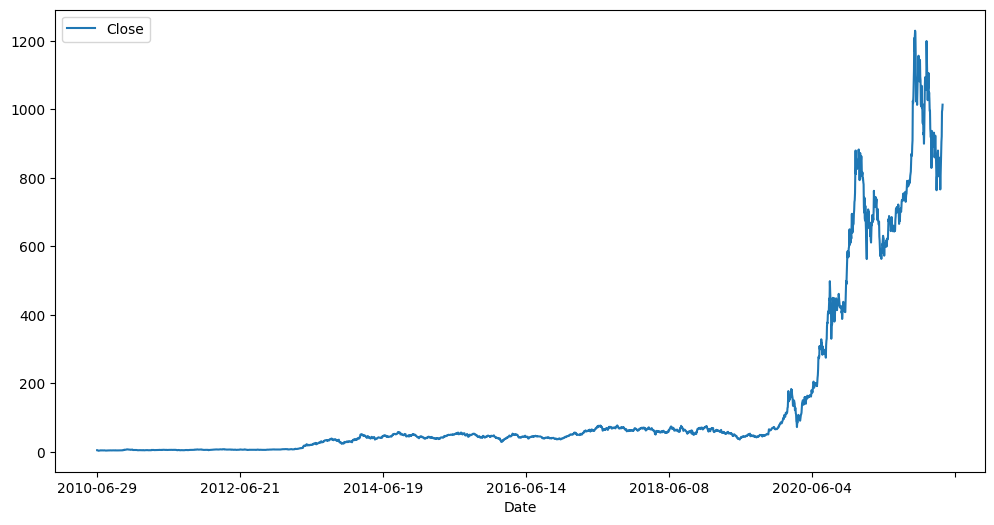

In [11]:
dataset.plot(figsize=(12,6))

In [12]:
train_size=int(0.8*len(dataset))
test_size=len(dataset)- train_size
print(f'Train Size: {train_size}')
print(f"Test Size: {test_size}")

Train Size: 2364
Test Size: 592


In [17]:
data=dataset.values

train_df=data[:train_size,:]

test_df=data[train_size-60:,:]

In [16]:
X_train = []
y_train = []

for i in range(60, len(train_df)):
    X_train.append(train_df[i-60:i, :])
    y_train.append(train_df[i, :])

In [19]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [20]:
model = Sequential([
    LSTM(64,return_sequences=True, activation='tanh',input_shape=(X_train.shape[1:])),
    LSTM(32,return_sequences=False,activation='tanh'),
    Dense(64,activation='relu'),

    Dense(1,activation='linear')
])

model.compile(optimizer='adam',loss='mse')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1589.6552
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 535.7369
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 79.8860
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 19.0089
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 7.3193
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.0439
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 3.7552
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.8248
Epoch 9/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.7583
Epoch 10/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.5140
Epoch 11/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.0850
Epoch 12/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.2223
Epoch 13/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.9679
Epoch 14/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.8587
Epoch 15/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/st


KeyboardInterrupt



In [23]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_df)):
    x_test.append(test_df[i-60:i, 0])
    y_test.append(test_df[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [25]:
predictions=model.predict(x_test)
predictions

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([[69.619606],
       [69.46544 ],
       [70.47412 ],
       [70.012985],
       [70.07101 ],
       [66.90289 ],
       [66.58924 ],
       [65.67927 ],
       [65.89327 ],
       [65.80337 ],
       [66.58921 ],
       [66.96869 ],
       [66.38729 ],
       [65.75333 ],
       [66.69046 ],
       [67.53328 ],
       [68.95407 ],
       [69.73389 ],
       [70.60437 ],
       [70.71448 ],
       [72.303665],
       [72.74402 ],
       [73.33009 ],
       [73.763535],
       [73.9573  ],
       [74.17912 ],
       [74.31295 ],
       [74.40288 ],
       [74.44249 ],
       [74.37375 ],
       [74.37137 ],
       [74.43774 ],
       [74.51266 ],
       [74.56693 ],
       [74.62467 ],
       [74.67609 ],
       [74.68953 ],
       [74.69656 ],
       [74.73533 ],
       [74.7558  ],
       [74.75943 ],
       [74.76113 ],
       [74.76141 ],
       [74.77591 ],
       [74.78636 ],
       [74.79182 ],
       [74.79392 ],
       [74.794586],
       [74.79732 ],
       [74.80111 ],


In [ ]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])